FACULTAD DE CIENCIAS ECONOMICAS - UNIVERSIDAD DE BUENOS AIRES

> **MAESTRIA EN METODOS CUANTITATIVOS PARA LA GESTION Y ANALISIS DE DATOS EN ORGANIZACIONES** 


---



TRABAJO FINAL

> **ASIGNATURA**: METODOLOGIAS AVANZADAS DE APRENDIZAJE AUTOMATICO

> **ALUMNO:** DIEGO DE LUCIA G.

> 1er Cuatrimestre 2021


# Presentacion e informe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import random as rnd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [2]:
! wget https://github.com/diegodlg95/bases_MAAN/raw/main/marketing_data.csv

--2021-07-25 12:25:12--  https://github.com/diegodlg95/bases_MAAN/raw/main/marketing_data.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diegodlg95/bases_MAAN/main/marketing_data.csv [following]
--2021-07-25 12:25:12--  https://raw.githubusercontent.com/diegodlg95/bases_MAAN/main/marketing_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227054 (222K) [text/plain]
Saving to: ‘marketing_data.csv’

marketing_data.csv  100%[===================>] 221.73K  --.-KB/s    in 0.02s   

2021-07-25 12:25:13 (12.8 MB/s) - ‘marketing_data.csv’ saved [227054/227054]



****Sobre el dataset:****


El dataset consiste en 2.240 registros y 28 variables de clientes sobre una compania anonima, registrados a lo largo de 1 anio donde se presenta informacion sobre:

*  Perfil del consumidor
*  Preferencias de productos
*  Evolucion de campanias previas
*  Informacion de canales de venta

El conjunto de datos fue obtenido de Kaggle, pero dado que su fin inicial no era para predecir sino mas bien para hacer un analisis exploratorio de los datos, se opto por definir la variable "Response" como target a predecir. Dicha variable (binaria), expresa si el cliente acepto o no la ultima campania de Marketing lanzada por la empresa. Como podria esperarse, la distribucion tiene un desbalanceo considerable, cuyo baseline "natural" se ubica en 0.8506; es decir que 8,5 de cada 10 personas no acepto la campania.

**Descripcion de variables:**

*  'Year_Birth': fecha de nacimiento
*  'Education': nivel de educacion del cliente
*  'Marital_Status': estado civil
*  'Income': ingreso anual de unidad familiar
*  'Kidhome': cantidad de ninios en la casa
*  'Teenhome': cantidad de adolescentes en la casa
*  'Dt_Customer': fecha de primer compra del cliente
*  'Recency': dias desde la ultima compra
*  'MntWines': monto en compras de vino en ultimos 2 anios  
*  'MntFruits': monto en compras de frutas en ultimos 2 anios
*  'MntMeatProducts': monto en compras de carne en ultimos 2 anios
*  'MntFishProducts': monto en compras en pescados en ultimos 2 anios
*  'MntSweetProducts': monto en compras de productos dulces en ultimos 2 anios 
*  'MntGoldProds': monto de compras hechas a traves de la web
*  'NumDealsPurchases': cantidad de compras hechas en promocion
*  'NumWebPurchases': cantidad de compras hechas a traves de la web
*  'NumCatalogPurchases': cantidad de compras hechas a traves de catalogo
*  'NumStorePurchases': cantidad de compras hechas a traves de local fisico
*  'NumWebVisitsMonth': cantidad de compras hechas a traves de la web.
*  'AcceptedCmp3': 1 = si el cliente acepto la oferta en la 3er campania.
*  'AcceptedCmp4': 1 = si el cliente acepto la oferta en la 4ta campania.
*  'AcceptedCmp5': 1 = si el cliente acepto la oferta en la 5er campania.
*  'AcceptedCmp1': 1 = si el cliente acepto la oferta en la 1er campania. 
*  'AcceptedCmp2': 1 = si el cliente acepto la oferta en la 2da campania.
*  'Complain': 1 = si el cliente se quejo en los ultimos 2 anios
*  'Country': pais

***TARGET:***

*  'Response': 1 = si el cliente acepto la oferta en la ultima campania.

**INFORME:**

Consecuentemente con la consigna planteada, en el trabajo desarrollado a continuacion se comenzo en primer lugar realizando un breve Analisis Exploratorio de los datos a traves del cual se generaron nuevas variables y descartaron otras ([EDA](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=FGT4fYBoqxMb&line=2&uniqifier=1)). Por comentar algunas de las modificaciones realizadas, se combinaron ciertas variables mediante operaciones aritmeticas y se combinaron otras, relativas a la cantidad de distintos productos adquiridos por el cliente, mediante Componentes Principales ([Feature Eng](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=sB3qumkKT1dw&line=1&uniqifier=1)). 


Es de mencionar que del total de variables solo 1 de ellas presento valores perdidos (24; Income), pero para evitar acotar aun mas la ya de por si reducida cantidad de registros, los mismos fueron imputados. Por otro lado, si bien se detectaron ciertas variables con valores considerables como anomalos/outliers, solo se acciono sobre uno de ellos mediante la remocion de los mismos (3 clientes nacidos antes de 1910).

Luego de esto, y habiendo previamente normalizado los valores, se fracciono el dataset en un conjunto de prueba y otro de entrenamiento, para proceder en primera instancia a recodificar las variables categoricas a traves de la tecnica one-hot-encoding. Con estos datos, y tomando como metrica objetivo el accuracy (tambien podria haberse optado por considerar un metrica como F1-score o Precision dada la naturaleza del problema), se [optimizaron 3 diferentes modelos](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=Vl6K0ejNStmS&line=1&uniqifier=1): 

*   Regresion Logistica
*   Random Forest
*   Sequential NN

La optimizacion para los primeros dos, fue mediante una prueba combinatoria exhaustiva (con GridSearch y Cross Validation) y la de la Red Neuronal se realizo mediante la utilizacion de [Algoritmo Genetico](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=6OJ9-qJNPhuc&line=1&uniqifier=1) (probando con hasta 3 capas densas).

Comparando los 3 modelos, se encontro que los mejores resultados fueron alcanzados por la Red Neuronal multicapa, seguido de cerca por la Regresion Logistica y un poco por detras Random Forest. Los resultados y parametros asociados:

*   NN: Accuracy: 0.8995; capas: [85, 40, 35] ; epochs: 300 ; batch_size: 128
*   RL: Accuracy: 0.8820 ; {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
*   RF: Accuracy: 0.8777 ; {'criterion': 'entropy', 'max_depth': 64, 'n_estimators': 50}

En una siguiente instancia, y motivado por los efectos negativos de la expansion de la dimensionalidad resultado de la aplicacion de one-hot-encoding, se experimento reemplazando dicha codificacion por una [Red Nueronal de Embeddings](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=1LQNMfjervDF&line=1&uniqifier=1) sobre las mismas variables categoricas. Con esto, se repitio el mismo procedimiento, [optimizando los 3 algoritmos](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=oc-ofUpOr3WM&line=1&uniqifier=1) arriba mencionados (cabe mencionar que la Red Neuronal deja de ser secuencial debido a la implementacion de distintas capas de embeddings, en parelismo).

Los resultados alcanzados con Embeddings en lugar de one-hot, son considerablemente satisfactorios para la [Red Neuronal](https://colab.research.google.com/drive/1T72EsxlwwhUa7i-eX2ZWMzTyk4JqweuP#scrollTo=Gij33rjNr9MY&line=1&uniqifier=1), mejorando la performance respecto a todos los demas resultados obtenidos. Mientras que por el lado de los algoritmos mas tradicionales (Regresion Logistica y Random Forest), la performance empeoro significativamente, llegando a ubicarse casi a la par del baseline "natural". A continuacion los puntajes y parametros asociados al modelo:

*   NN: Accuracy: 0.9140; capas: [125, 35, 85]; epochs: 300 ; batch_size: 128
*   RL: Accuracy: 0.8514; {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
*   RF: Accuracy: 0.8440; {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 100}

CONCLUSIONES:

Tanto aplicando one-hot, como embeddings para tratar las variables categoricas, el mejor modelo para esta problematica resulto ser la red neuronal. Un punto no menor a mencionar, es utilizando one-hot, la Regresion Logistica se ubico levemente por detras, pero es computacionalmente mucho mas eficiente; ahora bien, si se utiliza una red de embeddings, la diferencia en performance compensa por demas al menor tiempo de procesamiento (esto tiene un componente subjetivo, y conforma la opinion del autor para la casuistica aqui presente).

Con mas tiempo, se podria probar:

*  Balanceando el dataset (over, under sampling u SMOTE).
*  Optimizando en base a metrica F1-score o Precision.
*  Optimizar mas parametros de la Redes Neuronales, por ej. funciones de activacion, capas de regularizacion (~dropout), learning rate, algoritmo de optimizacion
*  Optimizar los nodos y capas de la red de embeddings (idem anterior).
*  Probar otros modelos como KNN o Boosted Classification Trees.


# EDA y Feauture Engineering

In [14]:
df = pd.read_csv("marketing_data.csv")
df.head(50)

#df.info()

df.columns = df.columns.str.replace(' ', '') # ya que hay espacios en nombres de columnas 
df = df.set_index('ID')
# Income esta de tipo Object debido al signo $ 
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dayofweek'] = df['Dt_Customer'].dt.dayofweek
df.isna().sum() # 24 NAs en Income -> ~1% del total. Se imputan para no perder observaciones

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1826 to 4070
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


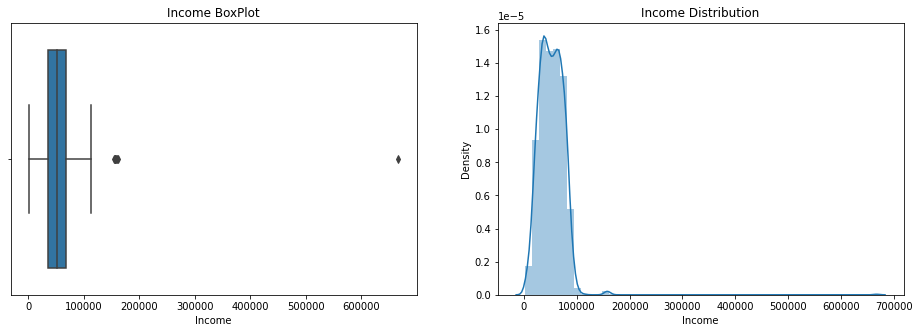

In [15]:
# Income Na's imputation 

fig, ax =plt.subplots(1,2, figsize = (16,5))

sns.boxplot(df.Income, ax=ax[0]).set_title('Income BoxPlot') 
sns.distplot(df.Income, ax=ax[1]).set_title('Income Distribution')

fig.show()

# df[df.Income > 100000]

# Se puede ver lo concentrada que esta la distribucion, mas del 99% de los datos estan entre 0 y 100k. Asimismo, se identifica outlier (Income = 666666.0) el cual se descarta por ser radicalmente mayor(+ 3,5x 2do valor maximo)
# En lo que respecta a la imputacion de los Nas, se opta por imputar con la mediana debido a su propiedad de robustez ante los valores extremos pertenecientes al menos de 1% restante.

df['Income'].fillna(df['Income'].median(),inplace=True)

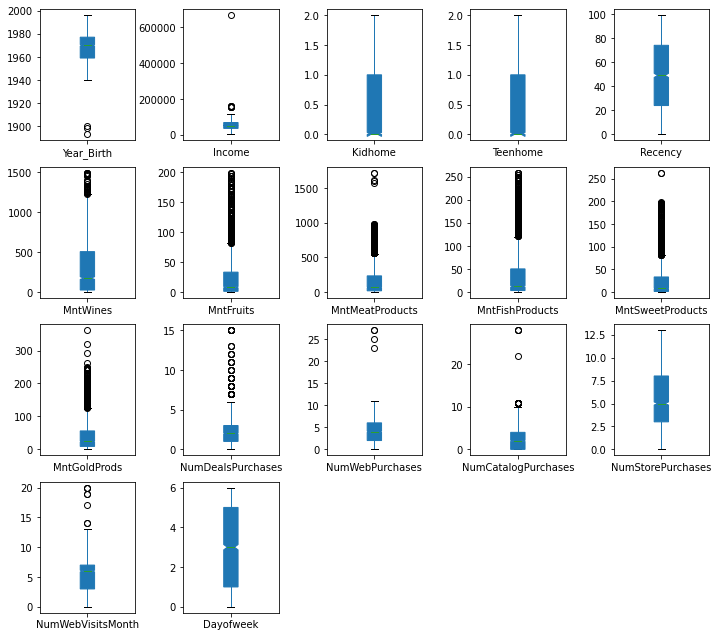

In [16]:
# EDA: VARIABLES NUMERICAS

# df.drop('ID',axis=1).plot(subplots=True, layout=(6,5), kind='box', figsize=(12,14),notch=True, patch_artist=True)
# plt.subplots_adjust(wspace=0.5)
# variables binarias sin valores anomalos (todo 0 y 1)

df.drop(columns=[ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).plot(subplots=True, layout=(5,5), kind='box', figsize=(12,14),notch=True, patch_artist=True)
plt.subplots_adjust(wspace=0.5)

# Year_birth e Income tienen valores anomalos llamativos, se descartan aquellos registros con Year_birth menores a 1910 (suponiendo el dataset tenga cierta antiguedad, maximo de edad 100 anios -> x > 1910)

df = df[df.Year_Birth > 1910]


In [17]:
# Total Campanias aceptadas
campaigns_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'] 
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# Total menores en unidad familiar
df['Menores'] = df['Kidhome'] + df['Teenhome']

dropped = [ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'Kidhome','Teenhome','Dt_Customer'] # solo se dejan las ultimas 2 campanias

df = df.drop(dropped, axis=1) 

# Recodificacion de variables categoricas
categoricas = ['Education','Marital_Status','Country', 'Dayofweek']
continuas = df.drop(columns =(categoricas+['Response']),axis=1).columns
a_predecir = "Response"

for i in categoricas:

  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1826 to 4070
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2237 non-null   int64  
 1   Education            2237 non-null   int8   
 2   Marital_Status       2237 non-null   int8   
 3   Income               2237 non-null   float64
 4   Recency              2237 non-null   int64  
 5   MntWines             2237 non-null   int64  
 6   MntFruits            2237 non-null   int64  
 7   MntMeatProducts      2237 non-null   int64  
 8   MntFishProducts      2237 non-null   int64  
 9   MntSweetProducts     2237 non-null   int64  
 10  MntGoldProds         2237 non-null   int64  
 11  NumDealsPurchases    2237 non-null   int64  
 12  NumWebPurchases      2237 non-null   int64  
 13  NumCatalogPurchases  2237 non-null   int64  
 14  NumStorePurchases    2237 non-null   int64  
 15  NumWebVisitsMonth    2237 non-null 

In [18]:
# Split en X e y + baseline

X =  df.drop(a_predecir, axis=1)
y = df[a_predecir]

X.info()
print(X.shape,y.shape,'Baseline %:',1-sum(y)/len(y))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1826 to 4070
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2237 non-null   int64  
 1   Education            2237 non-null   int8   
 2   Marital_Status       2237 non-null   int8   
 3   Income               2237 non-null   float64
 4   Recency              2237 non-null   int64  
 5   MntWines             2237 non-null   int64  
 6   MntFruits            2237 non-null   int64  
 7   MntMeatProducts      2237 non-null   int64  
 8   MntFishProducts      2237 non-null   int64  
 9   MntSweetProducts     2237 non-null   int64  
 10  MntGoldProds         2237 non-null   int64  
 11  NumDealsPurchases    2237 non-null   int64  
 12  NumWebPurchases      2237 non-null   int64  
 13  NumCatalogPurchases  2237 non-null   int64  
 14  NumStorePurchases    2237 non-null   int64  
 15  NumWebVisitsMonth    2237 non-null 

In [19]:
# Standarizacion de Columnas numericas

scaler = StandardScaler()
#num_cols = X.select_dtypes(include=numerics).drop(['Year_Birth','Dayofweek'], axis =1).columns

X_scaled = scaler.fit_transform(X[continuas].values)

X_scaled = pd.DataFrame(X_scaled,index=X.drop(continuas,axis=1).index, columns=continuas)
X_scaled = pd.concat([X_scaled, X.drop(continuas, axis=1)], axis=1)

X_scaled.head(10)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp4,AcceptedCmp5,Complain,TotalCampaignsAcc,Menores,Education,Marital_Status,Country,Dayofweek
ID,,,,,,,,,,,,,,,,,,,,,,,
1826,0.093881,1.302341,-1.69621,-0.341741,1.957573,0.940040,1.345050,3.922303,3.344011,-0.686563,-0.031369,0.457611,0.063267,-1.780485,-0.284036,-0.279414,-0.09498,-0.438816,-1.264618,2,2,6,0
1,-0.675395,0.194251,-1.69621,0.475497,-0.535684,-0.456170,-0.558746,-0.655663,-0.133904,-0.686563,1.048218,0.115473,0.370940,-0.131574,-0.284036,-0.279414,-0.09498,1.035104,-1.264618,2,4,1,6
10476,-0.931821,0.600679,-1.69621,-0.505189,-0.384577,-0.478332,-0.412300,-0.607218,-0.268409,-0.686563,-0.391232,-0.226664,-0.244405,-1.368257,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2,3,7,1
1386,-0.162544,-0.788948,-1.69621,-0.873689,-0.661606,-0.735412,-0.686886,-0.655663,-0.844859,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-0.284036,-0.279414,-0.09498,-0.438816,1.395420,2,5,0,6
5371,1.717910,-1.228286,-1.69621,-0.885576,-0.258655,-0.633467,-0.485523,-0.655663,-0.191549,-0.169096,-0.391232,-0.568802,-1.167421,0.692882,-0.284036,-0.279414,-0.09498,1.035104,0.065401,2,4,6,1
7348,-0.931821,0.777372,-1.69621,0.095110,2.612368,1.081877,3.706489,0.119443,-0.018614,-0.686563,-0.031369,1.484023,-0.244405,-1.368257,-0.284036,-0.279414,-0.09498,-0.438816,-1.264618,4,4,6,0
4073,-1.273722,0.452781,-1.69621,1.381889,1.353147,0.377124,-0.412300,0.167887,0.404116,-0.686563,2.127805,2.510435,0.370940,0.280654,-0.284036,-0.279414,-0.09498,1.035104,-1.264618,0,3,2,2
1991,-0.162544,-0.291417,-1.69621,-0.671608,-0.661606,-0.691088,-0.686886,-0.655663,-0.710354,-0.686563,-0.751094,-0.568802,-0.859749,-0.131574,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2,5,6,5
4047,-1.273722,0.523076,-1.69621,0.237755,-0.661606,-0.287738,-0.302466,0.119443,-0.748784,0.348371,0.688356,-0.226664,0.986284,-0.543802,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,4,3,7,5


In [20]:
# Reduzco dimensionalidad, 6 variables de compras de productos distintos por 2 componentes principales
buyed_products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

pca = PCA(n_components=2)

products_pca = pca.fit_transform(X_scaled[buyed_products].values)

products_pca = pd.DataFrame(products_pca,index=X_scaled[buyed_products].index, columns=['products_pca1','products_pca2'])

X_scaled_full = pd.concat([X_scaled.drop(buyed_products, axis=1), products_pca], axis=1)
X_scaled_full

,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp4,AcceptedCmp5,Complain,TotalCampaignsAcc,Menores,Education,Marital_Status,Country,Dayofweek,products_pca1,products_pca2
ID,,,,,,,,,,,,,,,,,,,
1826,0.093881,1.302341,-1.696210,-0.686563,-0.031369,0.457611,0.063267,-1.780485,-0.284036,-0.279414,-0.09498,-0.438816,-1.264618,2,2,6,0,4.504636,-0.893689
1,-0.675395,0.194251,-1.696210,-0.686563,1.048218,0.115473,0.370940,-0.131574,-0.284036,-0.279414,-0.09498,1.035104,-1.264618,2,4,1,6,-0.818988,0.786705
10476,-0.931821,0.600679,-1.696210,-0.686563,-0.391232,-0.226664,-0.244405,-1.368257,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2,3,7,1,-1.090450,0.002200
1386,-0.162544,-0.788948,-1.696210,-0.686563,-1.110957,-0.910939,-1.167421,0.692882,-0.284036,-0.279414,-0.09498,-0.438816,1.395420,2,5,0,6,-1.796183,-0.352122
5371,1.717910,-1.228286,-1.696210,-0.169096,-0.391232,-0.568802,-1.167421,0.692882,-0.284036,-0.279414,-0.09498,1.035104,0.065401,2,4,6,1,-1.272350,-0.200247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,0.606732,0.569086,1.723526,-0.169096,0.328493,-0.226664,1.601628,-0.543802,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,4,2,7,3,0.419344,0.299718
5263,0.692208,-0.845582,1.723526,-0.686563,-1.110957,-0.910939,-0.859749,1.105110,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,0,3,6,1,-1.460034,-0.368477
22,0.606732,-0.236340,1.723526,-0.169096,0.688356,-0.568802,-0.244405,1.105110,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2,2,6,0,-1.149165,-0.013846


In [21]:
# Dummies
X_scaled_dum = pd.get_dummies(X_scaled_full, columns=categoricas)

X_scaled_dum.head(), X_scaled_dum.shape

# Split train, test con dummies
X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_scaled_dum, y, test_size=0.2, random_state=42, stratify = y)

print( 'Shapes:', X_dum_train.shape, X_dum_test.shape, y_dum_train.shape, y_dum_test.shape,'; y = 1 proportion %:',sum(y_dum_test)/len(y_dum_test), sum(y_dum_train)/len(y_dum_train))

Shapes: (1789, 43) (448, 43) (1789,) (448,) ; y = 1 proportion %: 0.14955357142857142 0.14924538848518726


# Regresion logistica y Random Forest con dummies

In [22]:
# Modelo 1 - 1er anio: REGRESION LOGISTICA con dummies

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
metrics_rlog_dum = []

# grid search con CrossValidation
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = cv,scoring='accuracy',error_score=0) # ,cv = cv 
grid_result = grid_search.fit(X_dum_train, y_dum_train)

# resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  metrics_rlog_dum.append((mean, stdev, param))

metrics_rlog_dum = pd.DataFrame(metrics_rlog_dum, columns= ['mean','stdev','params2']).sort_values(by='mean',ascending =False)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # Best: 0.882059 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

# confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# sns.heatmap(confusion_matrix, annot=True,cmap='Blues', fmt='g')

# print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
# plt.show() 

Best: 0.882059 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [23]:
# Modelo 2 - 1er anio: RANDOM FOREST con dummies

model_2 = RandomForestClassifier(class_weight='balanced')
criterion = ['gini','entropy']
max_depth = [2,4,8,16,32,64,128]
n_estimators = [10,25,50,75,100,150,300]
metrics_rf_dum = []

# define grid search
grid_2 = dict(criterion=criterion,max_depth=max_depth,n_estimators=n_estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_2 = GridSearchCV(estimator=model_2, param_grid=grid_2, n_jobs=-1,cv = cv, scoring='accuracy',error_score=0) # ,cv = cv 
grid_result_2 = grid_search_2.fit(X_dum_train, y_dum_train)

# summarize results
means_2 = grid_result_2.cv_results_['mean_test_score']
stds_2 = grid_result_2.cv_results_['std_test_score']
params_2 = grid_result_2.cv_results_['params']

for mean, stdev, param in zip(means_2, stds_2, params_2):
    metrics_rf_dum.append((mean,stdev,param))  

metrics_rf_dum = pd.DataFrame(metrics_rf_dum, columns= ['mean','stdev','params2']).sort_values(by='mean',ascending =False)
print("Best: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_)) # Best: 0.877772 using {'criterion': 'entropy', 'max_depth': 64, 'n_estimators': 50}
0.882059 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

Best: 0.877772 using {'criterion': 'entropy', 'max_depth': 64, 'n_estimators': 50}


# Algoritmo genetico para optimizar NN

In [141]:
def cromosoma_al_azar():
  cromosoma = [rnd.randint(1,20)*5,rnd.randint(0,20)*5,rnd.randint(0,20)*5]
  return cromosoma
cromosoma_al_azar()

def cromosomas_al_azar(n_subset):    
    subsets = []
    for _ in range(n_subset):
        i = cromosoma_al_azar() # probar list set 
        if i in subsets: # sin repeticion
          del(i) 
        else:
          subsets.append(i)    
    return subsets

print(cromosomas_al_azar(5))

[[20, 95, 40], [35, 90, 70], [20, 95, 35], [20, 35, 0], [75, 90, 100]]


In [143]:
# Cruza o recombina dos cromosomas
def cruzar(c1, c2, prob_cruce=0.8):
  
    if rnd.uniform(0,1)<prob_cruce:
      capa1 = rnd.randint(0,2)
      capa2 = rnd.randint(0,2)
      c3,c4= list(c1),list(c2)
      
      c3[capa1], c4[capa2] = c4[capa1], c3[capa2]
      c3[capa2], c4[capa1] = c4[capa1], c3[capa2]       

      return c3,c4
    else:
      return c1, c2

c1 = [70, 20, 55]
c2 = [90, 0, 90]
a,b = cruzar(c1, c2)
c1, c2, a,b
# muta un cromosoma
def mutar(cromosoma, prob_mut=0.8):
    capas = rnd.sample([0,2], 2)
    new_cromosoma = list(cromosoma)
    if rnd.uniform(0,1)<prob_mut:
          for capa in capas:
            new_cromosoma[capa] = rnd.randint(5,30)*5
          return new_cromosoma
    pass
    return cromosoma

i = [70, 20, 55]
b = mutar(i)
i,b

# Selecciona n_cantidad de cromosomas por sus aptitudes
def seleccionar(cromosomas, aptitudes, n_cantidad):
    # junta aptitudes y poblacion y los ordena por aptitud descendente
    s = sorted(zip(aptitudes, cromosomas), key=lambda x:x[0][1], reverse=True)
    return [x for x in s[:n_cantidad]]


# Deep learning: Sequential NN con dummies

In [147]:
# Neural network con dummies
y_dum_train_nn = tf.keras.utils.to_categorical(y_dum_train, 2) 
y_dum_test_nn = tf.keras.utils.to_categorical(y_dum_test, 2) 

# Defino red NN con dummies
def seq_model_eval(cromosoma, epochs = 100, batch_size = 128):
  # Modelo secuencial (no puede haber ramificaciones)
  nn_model_dum = tf.keras.models.Sequential()

  # Capa de entrada
  nn_model_dum.add(tf.keras.layers.InputLayer(input_shape=[X_dum_train.shape[1]]))
  # Capa densa # 1
  if cromosoma[0]:
    nn_model_dum.add(tf.keras.layers.Dense(units=cromosoma[0], activation='sigmoid'))
  pass
  # Capa densa # 2
  if cromosoma[1]>0: 
    nn_model_dum.add(tf.keras.layers.Dense(units=cromosoma[1], activation='sigmoid'))
  pass
  # Capa densa # 3
  if cromosoma[2]>0: 
    nn_model_dum.add(tf.keras.layers.Dense(units=cromosoma[2], activation='sigmoid'))
  pass
  nn_model_dum.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

  # compilamos el modelo antes de correrlo
  nn_model_dum.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) 

  # ajustamos el modelo, con un tamaño del lote dado, una cantidad de épocas, y el % de validación
  history = nn_model_dum.fit(X_dum_train, y_dum_train_nn, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=0.10)

  # evaluamos el modelo 
  loss, accuracy  = nn_model_dum.evaluate(X_dum_test, y_dum_test_nn, verbose=False)
  return loss, accuracy

cromosoma = cromosoma_al_azar()
seq_model_eval(cromosoma)


(0.2831951975822449, 0.890625)

In [ ]:
# Todo junto
# con 10 cromosomas de poblacion inicial y 5 generaciones
GENERACIONES = 5
TAM_POBLACION = 10
Q_EPOCHS = [100,300,500]
BATCH_SIZES = [64,128,256]

poblacion = cromosomas_al_azar(TAM_POBLACION)
mejores = []
for generacion in range(GENERACIONES):

  for epochs in Q_EPOCHS:

    for batch_sizes in BATCH_SIZES:
          
        aptitudes = [seq_model_eval(i, batch_size=256, epochs=50) for i in poblacion]
        mejores.append(seleccionar(poblacion, aptitudes, 2))
        mejores = sorted(mejores, key=lambda x:x[0][1], reverse=True)

        nuevo_individuo_1, nuevo_individuo_2 = cruzar(mejores[0][0][1], mejores[0][1][1])
        nuevo_individuo_3, nuevo_individuo_4 = cruzar(mejores[0][1][1], mejores[0][0][1])

        mutacion_1 = mutar(mejores[0][0][1])

        mutacion_2 = mutar(mejores[0][1][1])

        poblacion = list(list(zip(*mejores[0]))[1]) + \
            [nuevo_individuo_1, nuevo_individuo_2, nuevo_individuo_3, nuevo_individuo_4] + \
            [mutacion_1, mutacion_2]

  print(f'Generacion:{generacion}. El mejor hasta ahora es:', mejores[0][0],', epochs:', epochs, ', batch_size:', batch_sizes)

#el mejor hasta ahora es: ((0.28828516602516174, 0.8995535969734192), [85, 40, 35]) , epochs: 300 , batch_size: 128

In [16]:
# BORRAR
history = nn_model_dum.fit(X_dum_train, y_dum_train_nn,
                    validation_split=0.2,
                    verbose=False,
                    batch_size=128,
                    epochs=100)

loss, accuracy  = nn_model_dum.evaluate(X_dum_test, y_dum_test_nn, verbose=False)  # clasificacion
loss, accuracy # clasificacion

# Utilizando variables dummies, el algoritmo con mejor performance es la Red Neuronal secuencial, seguido por la Logistic Regression y por ultimo Random Forest
print('NN:',accuracy,'; RegLog:' ,grid_result.best_score_,'; Random Forest:', grid_result_2.best_score_) 

# Embeddings sobre categoricas 

In [149]:
# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_full, y, test_size=0.2, random_state=42, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1789, 19), (448, 19), (1789,), (448,))

In [155]:
# Embeddings para recodificar categoricas y volver a correr modelos tradicionales (1er anio)
X_train_emb, X_test_emb, y_train_emb, y_test_emb = X_train, X_test, y_train, y_test
y_train_emb_nn, y_test_emb_nn = tf.keras.utils.to_categorical(y_train_emb), tf.keras.utils.to_categorical(y_test_emb)

for cat in categoricas:
  n_cats = X_train[cat].max()+1
  n_embedding_size = min(50, n_cats//2-1) # cant de neuronas

  model = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(1, )),
      tf.keras.layers.Embedding(n_cats, n_embedding_size),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train[cat], y_train_emb_nn, batch_size=128, epochs=100, validation_data= (X_test[cat], y_test_emb_nn), verbose= False)

  loss, accuracy  = model.evaluate(X_test[cat],  y_test_emb_nn, verbose=False)
  loss, accuracy
  
  weights = model.layers[0].get_weights()[0]
  weights = pd.DataFrame(weights, columns=[f'{cat}_weight_{c}' for c in range(n_embedding_size)])
  weights[cat] = weights.index
  
  X_train_emb = X_train_emb.merge(weights).drop(cat, axis=1)
  X_test_emb = X_test_emb.merge(weights).drop(cat, axis=1)

X_train_emb.head()

,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp4,AcceptedCmp5,Complain,TotalCampaignsAcc,Menores,products_pca1,products_pca2,Education_weight_0,Marital_Status_weight_0,Marital_Status_weight_1,Marital_Status_weight_2,Country_weight_0,Country_weight_1,Country_weight_2,Dayofweek_weight_0,Dayofweek_weight_1
0,0.521257,0.243736,1.309013,-0.686563,0.688356,0.457611,2.216972,-0.543802,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2.493082,0.150865,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
1,-1.530147,0.741466,1.136299,-0.169096,-0.391232,0.457611,1.293956,-0.956029,-0.284036,-0.279414,-0.09498,-0.438816,-1.264618,2.017424,0.522319,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
2,0.093881,-0.812672,-1.247154,-0.686563,-1.110957,-0.910939,-1.167421,1.105110,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,-1.748574,-0.350404,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
3,-1.444672,-0.486403,-0.901726,-0.686563,-1.110957,-0.910939,-0.859749,0.280654,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,-1.666190,-0.393599,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
4,-1.701098,0.815395,0.376357,-0.686563,-0.391232,2.510435,0.370940,-1.368257,-0.284036,-0.279414,-0.09498,1.035104,-1.264618,3.002983,-0.943676,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675


# Regresion Logistica y Random Forest con Embeddings


In [160]:
# Modelo 1 - 1er anio: REGRESION LOGISTICA con EMBEDDINGS

model = LogisticRegression() # se probo cambiando los pesos de clases a predecir, w = {0:15, 1:85} pero performa muy mal -> 0.59 acc. Probar optimizando
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
metrics_rlog_emb = []

# grid search con CrossValidation
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv = cv,scoring='accuracy',error_score=0) # ,cv = cv 
grid_result = grid_search.fit(X_train_emb, y_train)

# resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  metrics_rlog_emb.append((mean, stdev, param))

metrics_rlog_emb = pd.DataFrame(metrics_rlog_emb, columns= ['mean','stdev','params2']).sort_values(by='mean',ascending =False)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # Best: 0.851499 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp4,AcceptedCmp5,Complain,TotalCampaignsAcc,Menores,products_pca1,products_pca2,Education_weight_0,Marital_Status_weight_0,Marital_Status_weight_1,Marital_Status_weight_2,Country_weight_0,Country_weight_1,Country_weight_2,Dayofweek_weight_0,Dayofweek_weight_1
0,0.521257,0.243736,1.309013,-0.686563,0.688356,0.457611,2.216972,-0.543802,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,2.493082,0.150865,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
1,-1.530147,0.741466,1.136299,-0.169096,-0.391232,0.457611,1.293956,-0.956029,-0.284036,-0.279414,-0.09498,-0.438816,-1.264618,2.017424,0.522319,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
2,0.093881,-0.812672,-1.247154,-0.686563,-1.110957,-0.910939,-1.167421,1.105110,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,-1.748574,-0.350404,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
3,-1.444672,-0.486403,-0.901726,-0.686563,-1.110957,-0.910939,-0.859749,0.280654,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,-1.666190,-0.393599,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
4,-1.701098,0.815395,0.376357,-0.686563,-0.391232,2.510435,0.370940,-1.368257,-0.284036,-0.279414,-0.09498,1.035104,-1.264618,3.002983,-0.943676,0.483878,-0.079432,0.088244,0.082499,0.263446,0.272072,0.311502,-0.315154,-0.216675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,0.264832,-0.016551,-0.418127,-0.169096,-0.751094,-0.910939,-0.859749,0.692882,-0.284036,-0.279414,-0.09498,-0.438816,1.395420,-1.694258,-0.282163,0.483878,-0.240546,0.139790,0.161987,0.303965,0.304204,0.326719,-0.376329,-0.296665
1785,0.179357,-0.454372,0.479986,-0.686563,-1.110957,-0.568802,-1.167421,0.692882,-0.284036,-0.279414,-0.09498,-0.438816,1.395420,-1.561580,-0.125105,0.483878,-0.240546,0.139790,0.161987,0.303965,0.304204,0.326719,-0.376329,-0.296665
1786,-0.504445,-0.109891,-0.694469,0.865837,-0.751094,2.852573,-0.244405,-1.368257,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,1.185650,1.518085,0.353215,-0.240546,0.139790,0.161987,0.303965,0.304204,0.326719,-0.376329,-0.296665
1787,0.350307,-0.841309,0.169101,-0.686563,-1.110957,-0.910939,-0.859749,0.280654,-0.284036,-0.279414,-0.09498,-0.438816,0.065401,-1.580884,-0.362984,0.546997,-0.240546,0.139790,0.161987,0.303965,0.304204,0.326719,-0.376329,-0.296665


In [161]:
# Modelo 2 - 1er anio: RANDOM FOREST con dummies

model_2 = RandomForestClassifier(class_weight='balanced')
criterion = ['gini','entropy']
max_depth = [2,4,8,16,32,64,128]
n_estimators = [10,25,50,75,100,150,300]
metrics_rf_emb = []

# define grid search
grid_2 = dict(criterion=criterion,max_depth=max_depth,n_estimators=n_estimators)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_search_2 = GridSearchCV(estimator=model_2, param_grid=grid_2, n_jobs=-1,cv = cv, scoring='accuracy',error_score=0) # ,cv = cv 
grid_result_2 = grid_search_2.fit(X_train_emb, y_train)

# summarize results
means_2 = grid_result_2.cv_results_['mean_test_score']
stds_2 = grid_result_2.cv_results_['std_test_score']
params_2 = grid_result_2.cv_results_['params']

for mean, stdev, param in zip(means_2, stds_2, params_2):
    metrics_rf_emb.append((mean,stdev,param))  

metrics_rf_emb = pd.DataFrame(metrics_rf_emb, columns= ['mean','stdev','params2']).sort_values(by='mean',ascending =False)
print("Best: %f using %s" % (grid_result_2.best_score_, grid_result_2.best_params_)) # Best: 0.844047 using {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 100}

Best: 0.844047 using {'criterion': 'gini', 'max_depth': 32, 'n_estimators': 100}


# Deep Learning: Mixed NN - Embeddings y Sequential

In [167]:
continuas = X_scaled_full.drop(columns = categoricas,axis=1).columns 

cromosoma = cromosoma_al_azar()

def mixed_nn_model_eval(cromosoma, epochs = 100, batch_size = 128):

  embeddings = []
  inputs = []

  for c in categoricas:
      n_cats = X_scaled_full[c].max()+1
      n_emb_size = min(50, n_cats//2+1)
      inp = tf.keras.layers.Input(shape=[1], name=f'inp_{c.replace(" ", "_")}')
      emb = tf.keras.layers.Embedding(n_cats, n_emb_size, name=f'emb_{c.replace(" ", "_")}')(inp)

      inputs.append(inp)
      embeddings.append(emb)

  embs = tf.keras.layers.concatenate(embeddings)
  flatten_embs = tf.keras.layers.Flatten()(embs)

  inp_continuas = tf.keras.layers.Input(shape=len(continuas), name='inp_continuas')

  flatten_embs_conts = tf.keras.layers.concatenate([flatten_embs, inp_continuas])

  if cromosoma[0]>1:
    dense01 = tf.keras.layers.Dense(cromosoma[0], activation='sigmoid', name='dense01')(flatten_embs_conts)

    if cromosoma[1]>0:
      dense02 = tf.keras.layers.Dense(cromosoma[1], activation='sigmoid', name='dense02')(dense01)
      
      if cromosoma[2]>0:
        dense03 = tf.keras.layers.Dense(cromosoma[2], activation='sigmoid', name='dense03')(dense02)
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense03)
      else:
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense02)

    else: 
      if cromosoma[2]>0:
        dense02 = tf.keras.layers.Dense(cromosoma[2], activation='sigmoid', name='dense02')(dense01)
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense02)
      else:
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense01)
  else:
    if cromosoma[1]>0:
      dense01 = tf.keras.layers.Dense(cromosoma[1], activation='sigmoid', name='dense02')(flatten_embs_conts)
      
      if cromosoma[2]>0:
        dense02 = tf.keras.layers.Dense(cromosoma[2], activation='sigmoid', name='dense03')(dense01)
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense02)
      else:
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense01)

    else:
      if cromosoma[2]>0:
        dense01 = tf.keras.layers.Dense(cromosoma[2], activation='sigmoid', name='dense02')(flatten_embs_conts)
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense01)
      else:
        dense01 = tf.keras.layers.Dense(rnd.randint(15,30)*5, activation='sigmoid', name='dense02')(flatten_embs_conts)
        outputs = tf.keras.layers.Dense(2, activation='sigmoid', name='output')(dense01)

  model = tf.keras.models.Model(inputs=inputs+[inp_continuas], outputs=outputs)

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # clasificacion

  history = model.fit([X_train[c] for c in categoricas] + [X_train[continuas]], y_train_emb_nn, 
                      verbose=False,
                      batch_size=batch_size,
                      epochs=epochs)

  loss, accuracy  = model.evaluate([X_test[c] for c in categoricas] + [X_test[continuas]], y_test_emb_nn, verbose=False)
  return loss, accuracy 

mixed_nn_model_eval(cromosoma)

(0.26803070306777954, 0.8950892686843872)

In [166]:
cromosomas = cromosomas_al_azar(5)

aptitudes = [mixed_nn_model_eval(i) for i in cromosomas]

[(0.2717418968677521, 0.8727678656578064),
 (0.25574061274528503, 0.8883928656578064),
 (0.27253487706184387, 0.8683035969734192),
 (0.268725723028183, 0.8950892686843872),
 (0.2581373155117035, 0.8839285969734192)]

In [ ]:
# Todo junto
# con 10 cromosomas de poblacion inicial y 5 generaciones
GENERACIONES = 5
TAM_POBLACION = 10
Q_EPOCHS = [100,300,500]
BATCH_SIZES = [64,128,256]

poblacion = cromosomas_al_azar(TAM_POBLACION)
mejores = []
for generacion in range(GENERACIONES):

  for epochs in Q_EPOCHS:

    for batch_sizes in BATCH_SIZES:
          
        aptitudes = [mixed_nn_model_eval(i, batch_size=batch_sizes, epochs=epochs) for i in poblacion]
        mejores.append(seleccionar(poblacion, aptitudes, 2))
        mejores = sorted(mejores, key=lambda x:x[0][1], reverse=True)

        nuevo_individuo_1, nuevo_individuo_2 = cruzar(mejores[0][0][1], mejores[0][1][1])
        nuevo_individuo_3, nuevo_individuo_4 = cruzar(mejores[0][1][1], mejores[0][0][1])

        mutacion_1,mutacion_2 = mutar(mejores[0][0][1]), mutar(mejores[0][1][1])

        poblacion = list(list(zip(*mejores[0]))[1]) + \
            [nuevo_individuo_1, nuevo_individuo_2, nuevo_individuo_3, nuevo_individuo_4] + \
            [mutacion_1, mutacion_2]

  print(f'Generacion:{generacion}. El mejor hasta ahora es:', mejores[0][0],', epochs:', epochs, ', batch_size:', batch_sizes)

  #  ((0.2693330645561218, 0.9040178656578064), [125, 10, 85])],
